## Epsilon Analysis

#### Scenario :
- 5 eps_start values x 5 eps_end values = 25 combinations
- 7 seeds x 25 combinations = 175 unique runs

### Importing Dependencies

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Importing Grid Run Results

In [159]:
df=pd.read_csv('results.csv')
df['std_reward'].max()

231.48588207491187

### Numerical Pre-processing

In [156]:
df['seed'] = df['seed'].astype(int)
df['mean_reward'] = df['mean_reward'].astype(float).round(2)
df['std_reward'] = df['std_reward'].astype(float).round(2)
df.head()

,eps_start,eps_end,mean_reward,std_reward,seed
0,1.0,0.30,98.73,4.21,670487
1,1.0,0.10,180.29,20.95,670487
2,1.0,0.20,99.90,3.78,670487
3,1.0,0.05,101.25,3.88,670487
4,1.0,0.01,106.11,58.49,670487


### Plots per eps combination

- 7 seed runs distuingished by color
- x axis : variance and y axis : mean reward

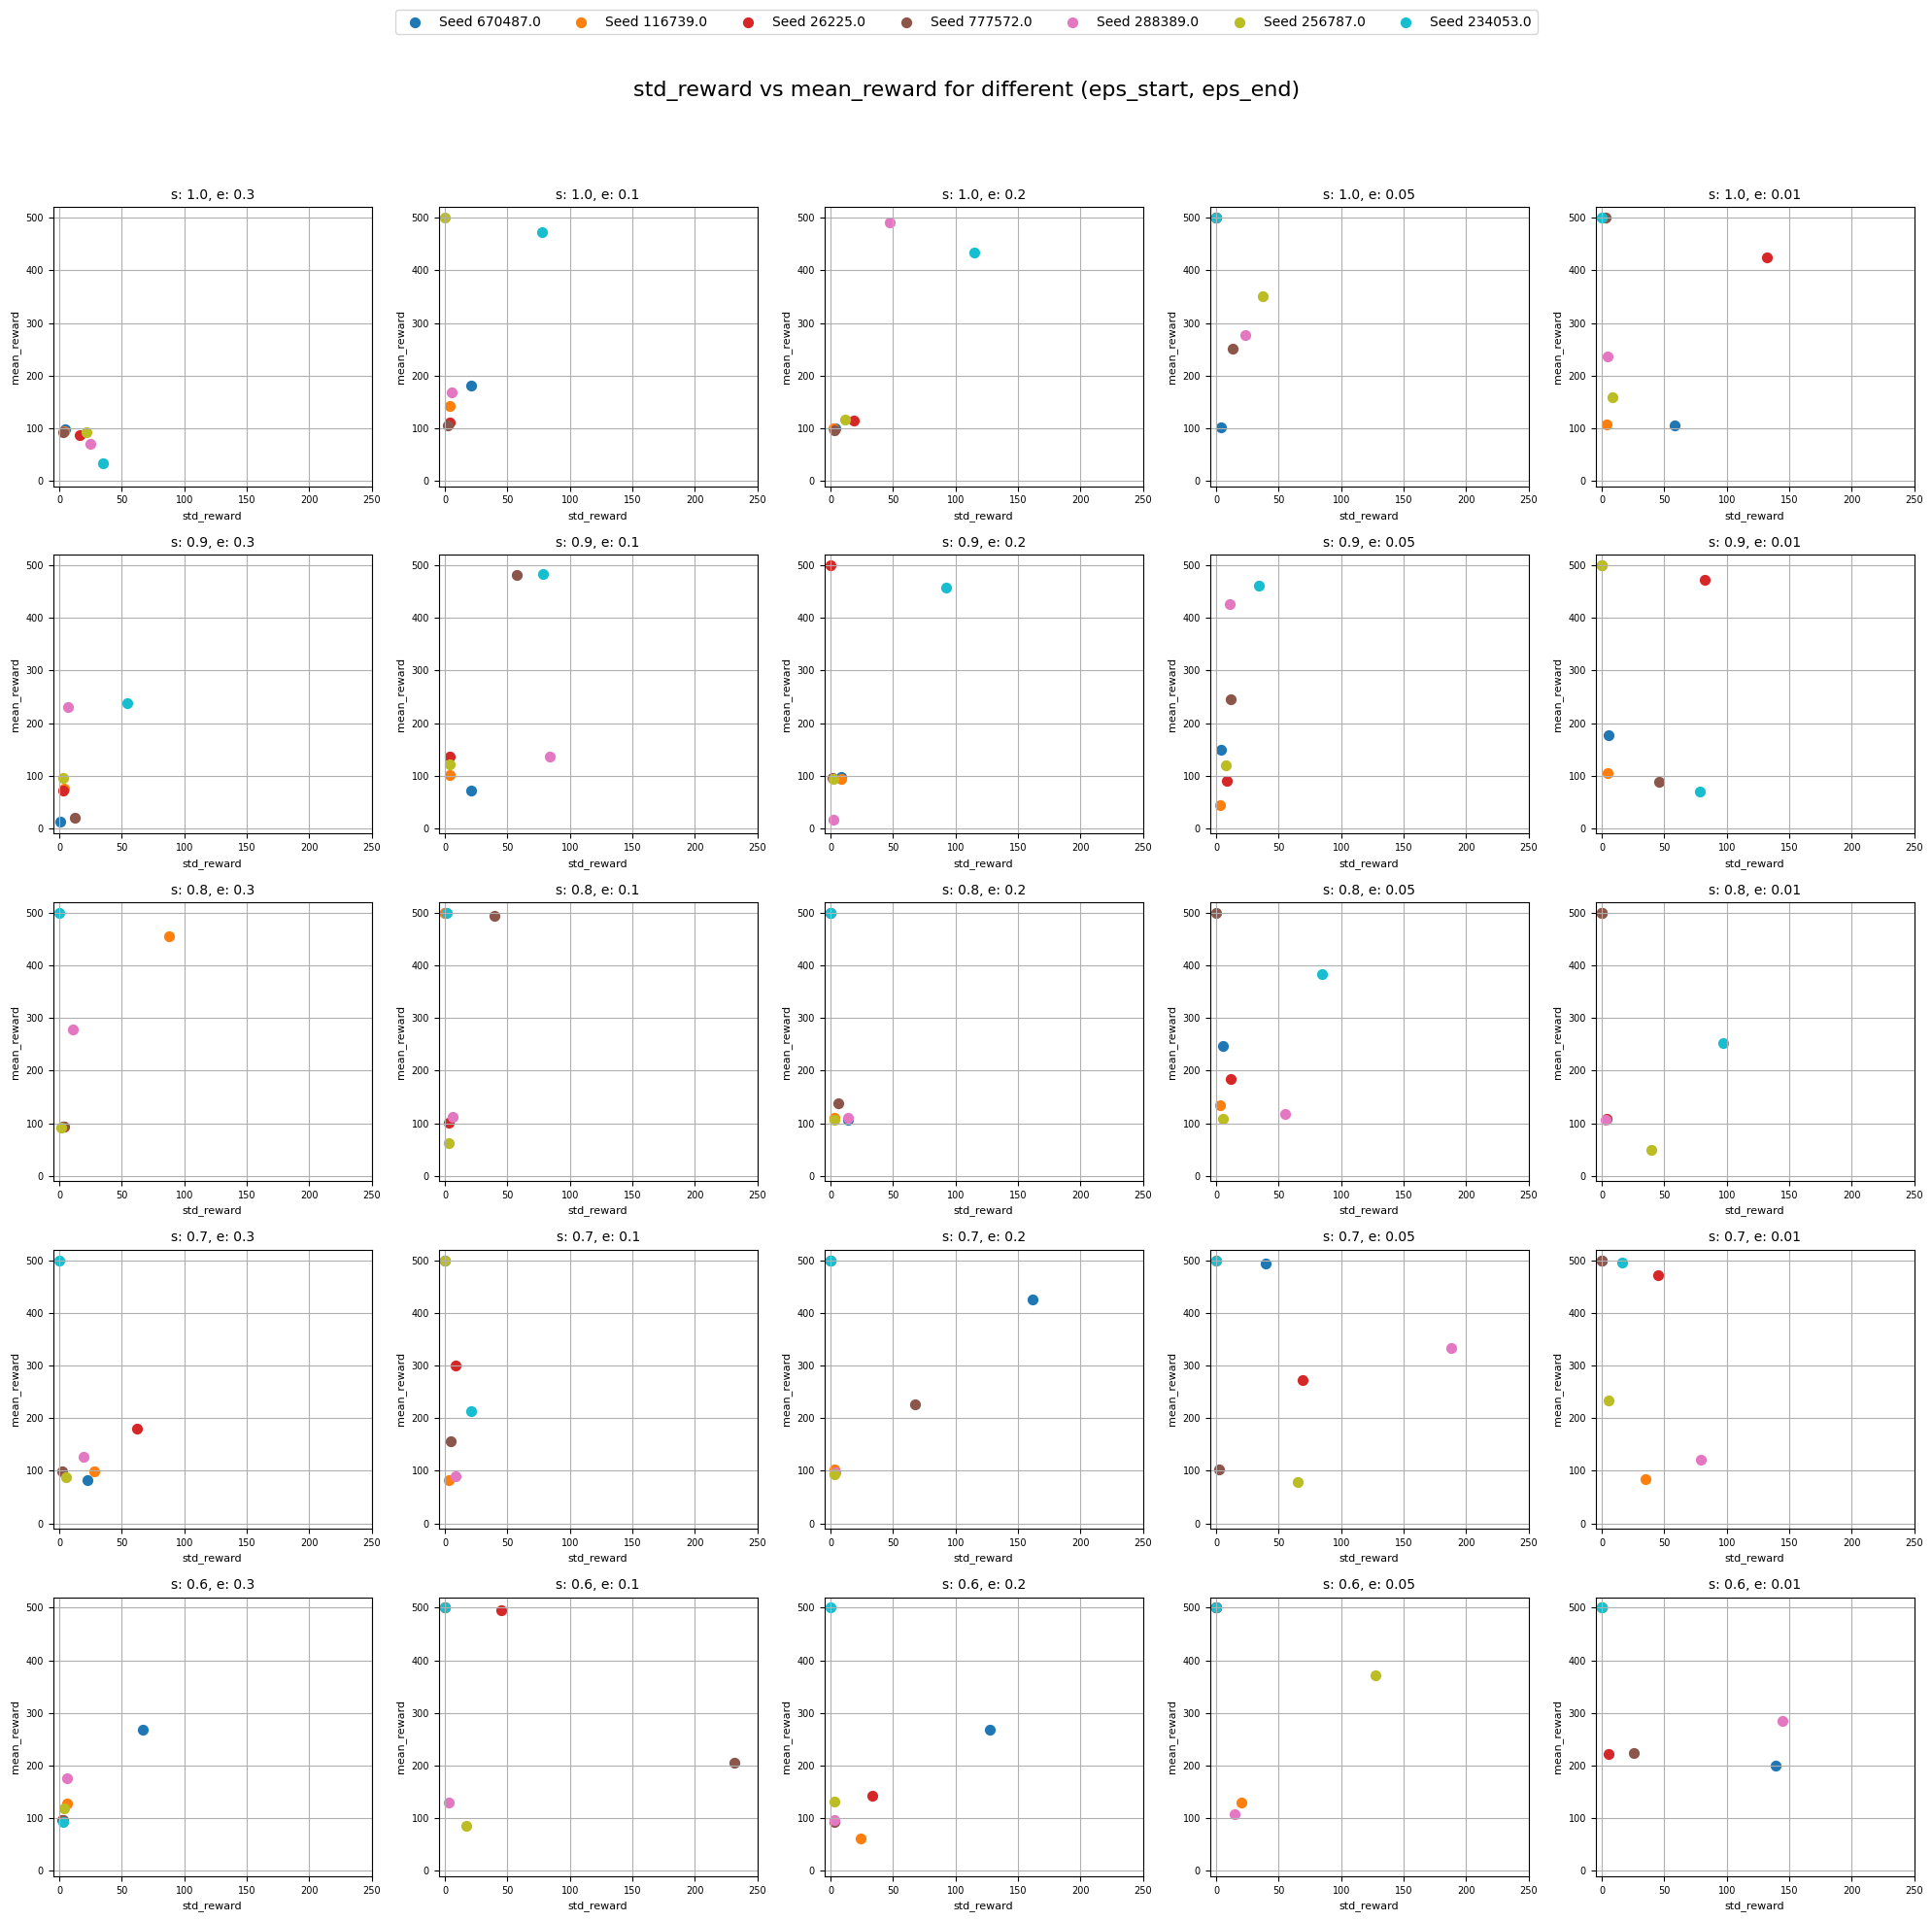

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

# Unique combinations
unique_combinations = list(product(df['eps_start'].unique(), df['eps_end'].unique()))
unique_seeds = df['seed'].unique()
colors = plt.cm.get_cmap('tab10', len(unique_seeds))  # Color map for seeds

# Create 5x5 grid
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
fig.suptitle('std_reward vs mean_reward for different (eps_start, eps_end)', fontsize=16)

for i, (eps_start, eps_end) in enumerate(unique_combinations):
    row, col = divmod(i, 5)
    ax = axes[row, col]
    subset = df[(df['eps_start'] == eps_start) & (df['eps_end'] == eps_end)]

    for j, seed in enumerate(unique_seeds):
        seed_data = subset[subset['seed'] == seed]

        label = f'Seed {seed}' if i == 0 else None
        ax.scatter(seed_data['std_reward'], seed_data['mean_reward'], 
                   color=colors(j), s=50, label=label)
    
    ax.set_title(f's: {eps_start}, e: {eps_end}', fontsize=10)
    ax.set_xlabel('std_reward', fontsize=8)
    ax.set_ylabel('mean_reward', fontsize=8)
    ax.tick_params(axis='both', labelsize=7)
    ax.grid(True)
    ax.set_xlim(-5, 250)
    ax.set_ylim(-10, 520)

fig.legend([f'Seed {s}' for s in unique_seeds],
           loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=7, fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Overall plot

- Circle radius proportional to mean.
- Circle color proportional to variance (blue to red increasing).
- x axis : eps start and y axis : eps end 

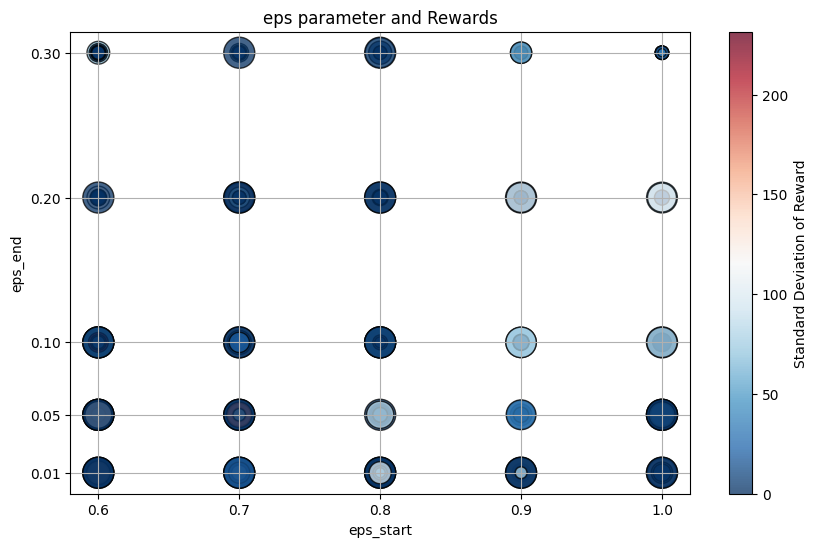

In [164]:
size_scale = 500 / df['mean_reward'].max()  # Scaling

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df['eps_start'],
    df['eps_end'],
    s=df['mean_reward'] * size_scale, 
    c=df['std_reward'],              
    cmap='RdBu_r',
    alpha=0.75,
    edgecolors='k'
)

eps_start_list = [1, 0.9, 0.8, 0.7, 0.6]
eps_end_list = [0.01, 0.05, 0.1, 0.2, 0.3]

plt.xticks(eps_start_list)
plt.yticks(eps_end_list)

plt.xlabel("eps_start")
plt.ylabel("eps_end")
plt.title("eps parameter and Rewards")

cbar = plt.colorbar(scatter)
cbar.set_label("Standard Deviation of Reward")

plt.grid(True)
plt.show()